In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

v_i = (v_dat / np.tan(52*(np.pi/180)) * 2 *(np.pi/180))

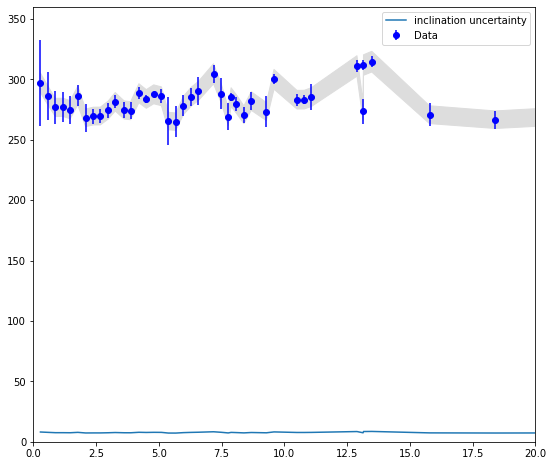

In [3]:
#Plot 

fig = plt.figure(figsize=(9.0,8.0))

plt.xlim(0,20)
plt.ylim(0,360)

rval = np.arange(0.1,200,0.1)

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,v_i,label='inclination uncertainty')
plt.fill_between(r_dat,v_dat-v_i,v_dat+v_i,color='#dddddd')

plt.legend()
plt.show()